<a href="https://colab.research.google.com/github/hakdj/teamproject2_final/blob/master/0923_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ÎèÑÍµ¨ Î™®Ïùå

In [1]:
!pip install konlpy

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 19.4 MB 1.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 448 kB 45.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 86 kB 6.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
import nltk  # natural language toolkit
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import konlpy
from konlpy.tag import Okt
okt = Okt() # ÌòïÌÉúÏÜå Ï∂îÏ∂ú
from konlpy.tag import Twitter # ÌïúÍ∏Ä ÌòïÌÉúÏÜå Ï∂îÏ∂ú

from collections import Counter # count 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ÌååÏùº Í∞ÄÏ†∏Ïò§Í∏∞

In [5]:
df=pd.read_csv('./youtubecomment.csv',encoding='cp949')

In [6]:
df.isnull().sum()

title      0
video      0
comment    3
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9182 entries, 0 to 9181
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    9182 non-null   object
 1   video    9182 non-null   object
 2   comment  9179 non-null   object
dtypes: object(3)
memory usage: 215.3+ KB


In [8]:
df

title        video                                            comment
0        ÏΩ©  eu7HhcuRsL4  ÎåÄÎ∂ÄÎ∂ÑÏù¥ Î†àÏãúÌîºÎßå Ïò¨Î¶¨ÎäîÎç∞ ÏöîÎ¶¨Í≥ºÏ†ïÎèÑ Ïò¨Î†§Ï£ºÏãúÎãà Îçî Ïù¥Ìï¥ÌïòÍ≥† Îî∞ÎùºÌïòÍ∏∞Í∞Ä Ïâ¨Ïö∏Í≤É Í∞ôÏïÑ...
1        ÏΩ©  eu7HhcuRsL4                                           ÎßõÎÇòÍ≤†ÎÑ§Ïöî „Öé„Öé
2        ÏΩ©  eu7HhcuRsL4                                        ÎØπÏÑúÍ∏∞Î•º ÏÇ¨ÏïºÍ≤ÑÎÑ§..
3        ÏΩ©  eu7HhcuRsL4          Í≥®Î™©ÎßâÍ±∏Î¶¨ÎûÄÍ≤å ÏûàÏóàÎÑ§Ïöî„Öã„Öã ÏΩ©Ï†ÑÏù¥Îûë Ï∫¨~~„Öã Îâ¥ÏöïÏÇ¨Îäî Îî∏ÏóêÍ≤å Í≥µÏú†ÌñàÎãµÎãàÎã§~
4        ÏΩ©  eu7HhcuRsL4                                           ÎÇòÏ§ëÏóê Ìï¥Ï§òÏïºÎîî
...    ...          ...                                                ...
9177    Ïó¥Î¨¥  8PEOg1YFqUU                               Íº≠ Ìï¥Î¥êÏïºÍ≤†ÎÑ§Ïöî ÎßõÏûàÍ≤å Ïûò Îê†Í≤ÉÍ∞ôÏïÑÏöî
9178    Ïó¥Î¨¥  8PEOg1YFqUU                   Î∞∞Ï¶ô ÎßêÍ≥† Îã§Î•∏ Ïû¨Î£åÎäî Ïñ¥Îñ§Í≤å ÏûàÏùÑÍπåÏöî? Î∞∞Í∞Ä ÎßéÏù¥ ÎπÑÏã∏Ïöî
9179    Ïó¥Î¨¥  8PEOg1YFqUU                                          Ï¢ãÏïÑÏöî Íæπ ÏûÖÎãàÎã§
9180    Ïó¥Î¨¥  8PEOg1YFqUU  ÏàòÎ∞ïÏùÑ Ïó¥Î¨¥Îûë Ìï®ÍªòÌïòÎ©¥ Î¨¥Ïä® ÎßõÏùºÍπå..? Í∂ÅÍ∏àÌï¥ÏÑú Ï†ÄÎèÑ Ïó¥Î¨¥,ÏñºÍ∞àÏù¥ ÏÇ¨Îü¨ Í∞ëÎãàÎã§.„Öé...
9181    Ïó¥Î¨¥  8PEOg1YFqUU                              Í≥ºÏùºÏ£ºÏä§ ÎßåÎìúÎäî Î∞©Î≤ïÏ¢Ä ÏïåÎ†§Ï£ºÏÑ∏Ïöî~~~

[9182 rows x 3 columns]

In [9]:
df2=df.dropna(how='any')

In [10]:
df2=df2.reset_index()

In [ ]:
df2

### ÏõêÌïòÎäî ÎÜçÏàòÏÇ∞Î¨º ÏÑ†ÌÉùÌï¥ÏÑú listÏóê Îã¥Í∏∞

In [136]:
lists=[]
ans=input()
for i in range(0,len(df2)):
  if df2['title'][i]==ans:
    lists.append(df2['comment'][i])
len(lists)


ÏãúÍ∏àÏπò


391

In [ ]:
# Îã¥Í∏¥ ÎÇ¥Ïö© ÌôïÏù∏Ïö©
lists

### Ïù¥Î™®Ìã∞ÏΩò Ï†úÍ±∞
### ÏΩîÎ©òÌä∏ df ÏÉùÏÑ± Î∞è Ï†ÄÏû•

In [14]:
import re

In [17]:
#Ïù¥Î™®Ìã∞ÏΩò Ï†úÍ±∞
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#Î∂ÑÏÑùÏóê Ïñ¥Í∏ãÎÇòÎäî Î∂àÏö©Ïñ¥Íµ¨ Ï†úÏô∏ (ÌäπÏàòÎ¨∏Ïûê, ÏùòÏÑ±Ïñ¥)
han = re.compile(r'[^ „Ñ±-„Ö£ Í∞Ä-Ìû£„Ñ±-„Öé„Öè-„Ö£!?~,".\n\r#\ufeff\u200d]')

def apply_regular_expression(text):
    hans = re.compile(r'[^ „Ñ±-„Ö£ Í∞Ä-Ìû£„Ñ±-„Öé„Öè-„Ö£!?~,".\n\r#\ufeff\u200d]') # ÌïúÍ∏Ä Ï∂îÏ∂ú Í∑úÏπô: ÎùÑÏñ¥ Ïì∞Í∏∞(1 Í∞ú)Î•º Ìè¨Ìï®Ìïú ÌïúÍ∏Ä
    result = hans.sub('', text)  # ÏúÑÏóê ÏÑ§Ï†ïÌïú "hangul"Í∑úÏπôÏùÑ "text"Ïóê Ï†ÅÏö©(.sub)ÏãúÌÇ¥
    return result


In [137]:
#ÏΩîÎ©òÌä∏ dfÏÉùÏÑ± Î∞è Ï†ÄÏû•
comment_result = []
for i in range(0,len(lists)):
  tokens = re.sub(emoji_pattern,"", lists[i])
  tokens = re.sub(han,"",tokens)
  comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])
#comment_result
comment_result.to_csv(r"./"+f"{ans}.csv",index=False, encoding='CP949')
type(comment_result)

pandas.core.frame.DataFrame

# Î∂ÑÏÑù

### Î™ÖÏÇ¨ Ï†ÑÏ≤òÎ¶¨ Î∞è ÎπàÎèÑ Ï∂úÎ†•

In [21]:
twitter = Twitter() 
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 

In [ ]:
#ÌôïÏù∏Ïö©
morphs

In [23]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Alpha'] and ("Îòê" not in word)and ("Îì±" not in word)and ("Ïïû" not in word)and ("ÏÉù" not in word)and ("Î•º" not in word)and ("Ïó¨Í∏∞" not in word)and ("Îã§Î•∏" not in word)and ("Ïòà" not in word)and ("ÏùÄ" not in word)and ("ÏúÑÌï¥" not in word)and ("Îã§Ïùå" not in word)and ("ÎåÄÌïú" not in word)and ("ÏïÑÏ£º" not in word)and ("Í∑∏" not in word)and ("ÎèÑÏõÄ" not in word)and ("ÏïΩ" not in word)and ("ÎïåÎ¨∏" not in word)and ("Ïó¨Îü¨" not in word) and ("Îçî" not in word) and ("Ïù¥" not in word) and ("Ïùò" not in word) and ("Î∞è" not in word) and ("Í≤É" not in word) and ("ÎÇ¥" not in word)and ("ÎÇò" not in word)and ("Ïàò"not in word) and("Í≤å"not in word)and("Îßê"not in word) : 
            noun_adj_adv_list.append(word) 
        if tag in ['Noun'] and ("Îòê" not in word)and ("Îì±" not in word)and ("Ïïû" not in word)and ("ÏÉù" not in word)and ("Î•º" not in word)and ("Ïó¨Í∏∞" not in word)and ("Îã§Î•∏" not in word)and ("Ïòà" not in word)and ("ÏùÄ" not in word)and ("ÏúÑÌï¥" not in word)and ("Îã§Ïùå" not in word)and ("ÎåÄÌïú" not in word)and ("ÏïÑÏ£º" not in word)and ("Í∑∏" not in word)and ("ÎèÑÏõÄ" not in word)and ("ÏïΩ" not in word)and ("ÎïåÎ¨∏" not in word)and ("Ïó¨Îü¨" not in word) and ("Îçî" not in word) and ("Ïù¥" not in word) and ("Ïùò" not in word) and ("Î∞è" not in word) and ("Í≤É" not in word) and ("ÎÇ¥" not in word)and ("ÎÇò" not in word)and ("Ïàò"not in word) and("Í≤å"not in word)and("Îßê"not in word) : 
            noun_adj_adv_list.append(word) 
print(noun_adj_adv_list)

['ÏòÅÏñ¥', 'ÏûêÎßâ', 'Î∂ÄÌÉÅ', 'ÌïúÍµ≠', 'ÏöîÎ¶¨', 'Í¥ÄÏã¨', 'Ïô∏Íµ≠Ïù∏', 'ÌïúÍµ≠', 'ÏµúÍ≥†', 'ÏöîÎ¶¨ÏÇ¨', 'ÏÜåÍ∞ú', 'ÌÜµÏó≠', 'ÏÜåÍ∞ú', 'Î∞òÏùë', 'Ïôú', 'ÏÑ§Î™Ö', 'Ìï¥Î®π', 'Ï≤®Î∂Ä', 'ÌÑ∞', 'ÏÜåÍ∏à', 'Î∞ò', 'Ïï°Ï†ì', 'Î∞ò', 'Ìï¥ÎèÑ', 'Ïö©', 'Ìï≠ÏÉÅ', 'Î†àÏãúÌîº', 'ÏãùÏ¥à', 'Í≥†ÍπÉÏßë', 'Î¨¥Ïåà', 'Îßõ', 'ÏãùÏ¥à', 'Î∞±Ï¢ÖÏõê', 'Ïó¨Î¶Ñ', 'Í±∞', 'Í≥†Ï∂îÏû•', 'Ï†Ñ', 'Ïï°Ï†ì', 'Î≤ÑÏ†Ñ', 'Ïó¨Î¶Ñ', 'Î¨¥', 'Î∞±Ï¢ÖÏõê', 'ÎßåÎä•', 'Î≥∂Ïùå', 'Í≥†Ï∂îÏû•', 'ÎπÑÎπÑ', 'ÎîîÏ†ÄÌä∏', 'Í≥†Ï∂îÏû•', 'Ï†Ä', 'ÏãùÏ¥à', 'Î≥ÑÎ°ú', 'ÏãùÏ¥à', 'Îçú', 'Ïå§', 'Í∞êÏÜ®', 'Î™©', 'Ïû•Í∞ë', 'Ïä§ÌÖù', 'Î®∏Î¶¨', 'ÏèôÏèô', 'Ïñ¥Ï©ú', 'Î®πÎäîÎ™®Ïäµ', 'Î≥µ', 'Îßõ', 'Î∞±Ï¢ÖÏõê', 'ÎßàÏûê', 'Í±∞', 'Ïä§Ìä∏Î¶¨Ìä∏', 'Ìë∏Îìú', 'ÏßÄÍ∏à', 'Ïôú', 'Îßõ', 'Î∞ÄÌèê', 'ÌÜ†Ïòπ', 'Ï†ÑÎ¨∏Í∞Ä', 'Ïä§Î©ú', 'Ïó∞Í∏∞', 'Ïûº', 'Ï†ú', 'Î∞îÎ°ú', 'Ï±ÑÏπº', 'Ìä∏ÎùºÏö∞Îßà', 'Í∏∞Ïñµ', 'Ïò§Ïò§Ïò§', 'Ïßë', 'Ï†àÎåÄ', 'Ïö§', 'ÍΩÉ', 'ÏÜåÍ∏à', 'ÏÜåÍ∏à', 'ÎßàÏûê', 'Ìä∏ÎùºÏö∞Îßà', 'Ïù∏', 'ÏöîÎ¶¨', 'ÏõÉÏùå', 'Íπ®Ïïå', 'ÌòπÏãú', 'Î¨¥', 'ÏàúÏÑú', 'Í∏∞Ïñµ', 'Ïú†', 'Ïïî

In [24]:
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())
print(words)

{'Î∞±Ï¢ÖÏõê': 69, 'ÏöîÎ¶¨': 61, 'Îßõ': 60, 'ÏßÑÏßú': 56, 'Í±∞': 45, 'Î¨¥': 45, 'Ï†Ä': 42, 'ÏπòÌÇ®': 42, 'Í∞ÑÏû•': 38, 'Î†àÏãúÌîº': 36, 'Îïå': 34, 'ÏùåÏãù': 33, 'b': 31, 'Íµ≠': 28, 'Ïßë': 27, 'Ïû•ÏïÑÏ∞å': 25, 'Î≥¥Í≥†': 24, 'Ïöî': 24, 'Ìï¥': 24, 'ÎùºÎ©¥': 24, 'ÏµúÍ≥†': 23, 'Ïôú': 22, 'Ïò§Îäò': 22, 'ÏñëÌåå': 22, 'ÏãúÍ∏àÏπò': 22, 'Ïå§': 21, 'ÏòÅÏÉÅ': 21, 'Î¨º': 21, 'Ìï¥Î®π': 20, 'ÏÇ¨Îûå': 19, 'Ìï≠ÏÉÅ': 18, 'Ïû¨Î£å': 18, 'ÏÜåÏä§': 18, 'Ïï°Ï†ì': 16, 'ÏãùÏ¥à': 16, 'ÎåÄÌëú': 15, 'Í∞êÏÇ¨': 15, 'Ïïà': 15, 'ÏÑ§Î™Ö': 14, 'ÎßåÎä•': 14, 'Ï¢Ä': 14, 'quot': 14, 'Í∞ú': 13, 'Ï∞∏Í∏∞Î¶Ñ': 13, 'ÎåÄÏã†': 13, 'ÏÜåÍ≥†Í∏∞': 13, 'Ï†Ñ': 12, 'ÌòπÏãú': 12, 'ÏÑ§ÌÉï': 12, 'ÎçïÎ∂Ñ': 12, 'Î¨¥Í∞Ä': 12, 'Í≥ÑÎûÄ': 12, 'Ï†ïÎèÑ': 12, 'Íº≠': 12, 'Íµ≠Î¨º': 12, 'ÏÜåÍ∏à': 11, 'Ï†ú': 11, 'ÍπÄÏπò': 10, 'Ïó≠Ïãú': 10, 'Î∂Ñ': 10, 'Í∞ÄÏßÄ': 10, 'ÏóÑÎßà': 10, 'Î∞©ÏÜ°': 10, 'Ìï¥ÎèÑ': 9, 'Î≥∂Ïùå': 9, 'ÏÇ¨Ïö©': 9, 'Ïö∞Î¶¨': 9, 'Î∞©Í∏à': 9, 'ÏïÑÏ†ÄÏî®': 9, 'Ïà†': 9, 'Î∞©Î≤ï': 9, 'ÌÉúÍµ≠': 9, 'Î∂ÄÌÉÅ': 8, 'ÏßÄÍ∏à': 8, 'Ï≤òÏùå': 8, 'Î¨¥Ïö∞

### ÏãúÍ∞ÅÌôî

In [25]:
from wordcloud import WordCloud # ÌÖçÏä§Ìä∏ ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt # ÏãúÍ∞ÅÌôî Ìå®ÌÇ§ÏßÄ
import matplotlib 
from IPython.display import set_matplotlib_formats

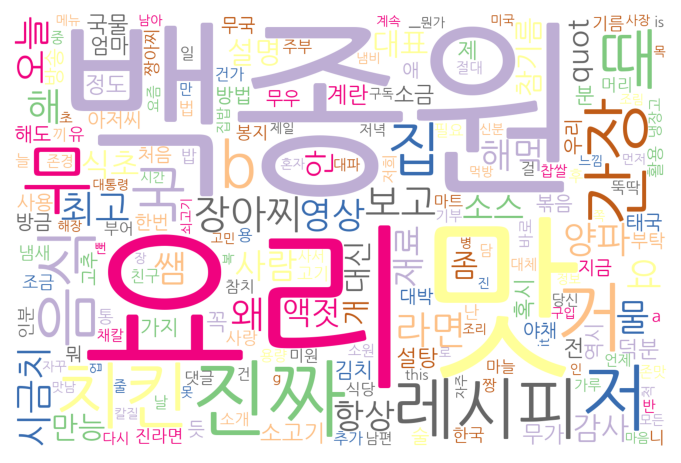

In [26]:
#word cloud show
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

wordcloud = WordCloud(font_path = '/content/Nanum.TTF', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

### Í∑∏ÎûòÌîÑ

In [27]:
import matplotlib.pylab as plt2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = "/content/NanumSquareL.ttf"
fontprop = fm.FontProperties(fname=path, size=20) # Í∏ÄÏûê ÌÅ¨Í∏∞ Ï°∞Ï†ï

In [28]:
def get_noun(comment_txt):
    twitter = Twitter()
    # okt = Okt()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))
type(comment_result)



pandas.core.frame.DataFrame

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


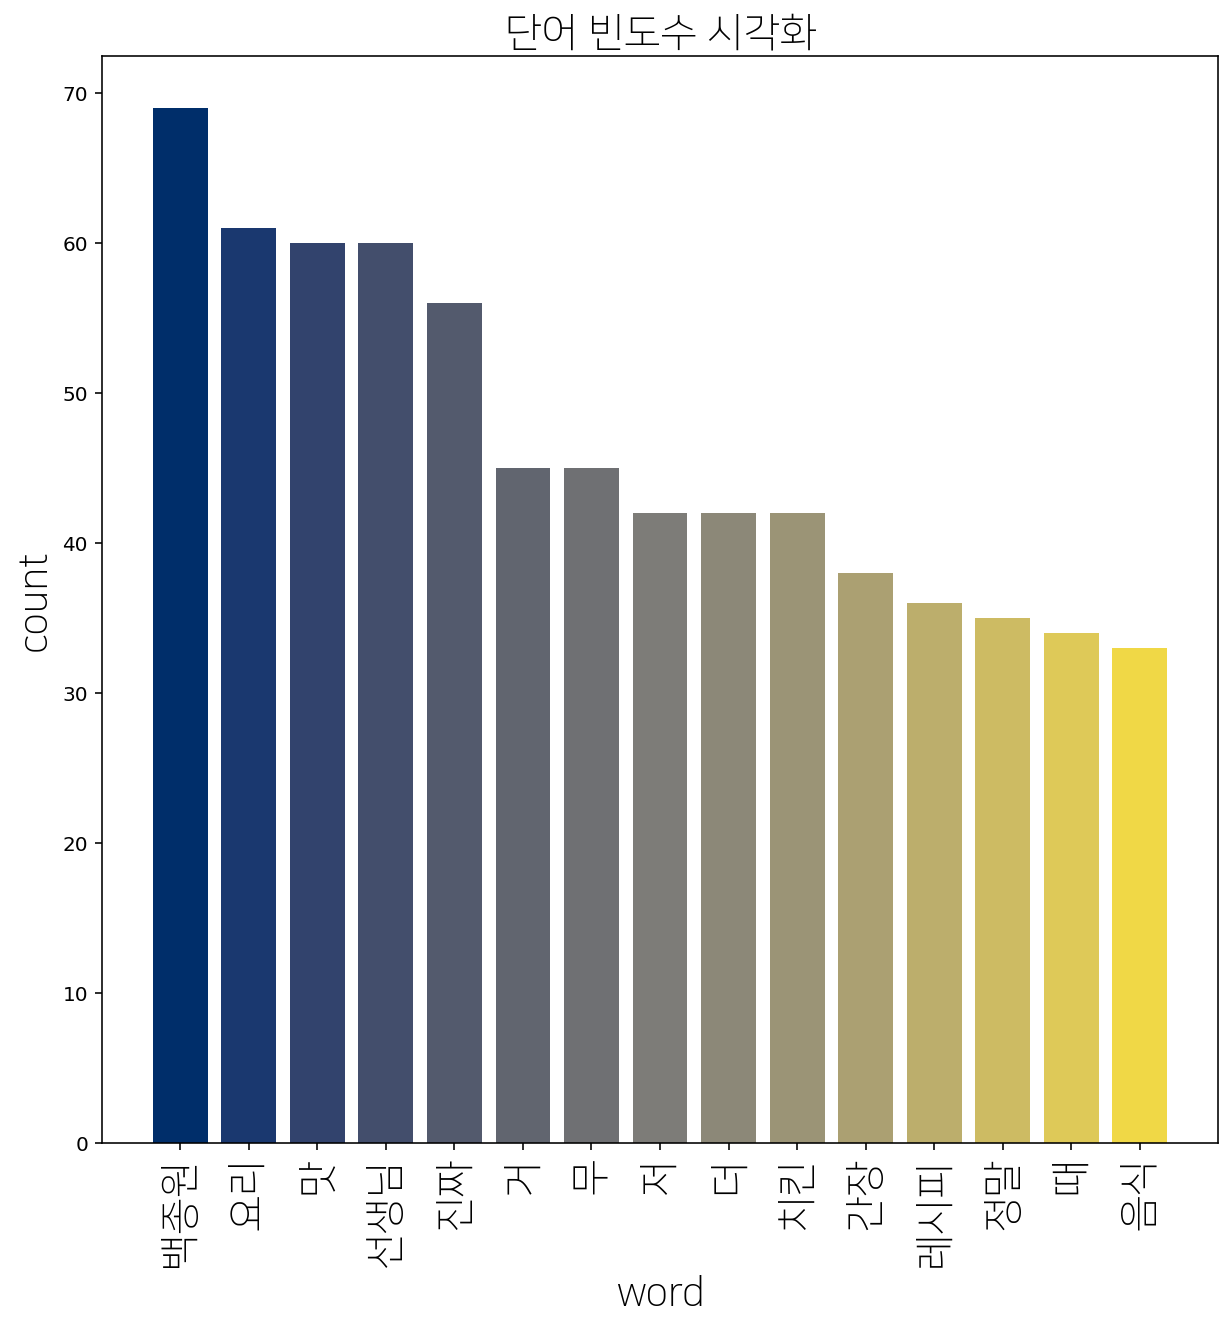

In [29]:

noun_list = []
for i in range(len(comment_result)):
    for j in range(len(comment_result['token'].iloc[i])):
        noun_list.append(comment_result['token'].iloc[i][j])
        
counts = Counter(noun_list)
tags = counts.most_common(15)

#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})
for i in range(len(tags)):
    word = tags[i][0]
    count = tags[i][1]
    
    insert_data = pd.DataFrame({'word':[word],
                                'count':[count]})
    test = test.append(insert_data)

test.index = range(len(test))

#Ï∞®Ìä∏Ïóê Ïª¨Îü¨ÎÑ£Í∏∞
import seaborn as sns
colors = sns.color_palette('cividis',len(test))
#Í∑∏Î¶¨Í≥† Î∞ëÏóêÎã§Í∞Ä plt.Ï∞®Ìä∏ÌòïÏãù(Í¥ÑÌò∏ ÏïàÏóê color=Ï∂îÍ∞Ä)



index = np.arange(len(test))
plt2.bar(index,test['count'].tolist(),color=colors)
plt2.xlabel('word', fontsize=8, fontproperties=fontprop)
plt2.ylabel('count', fontsize=8, fontproperties=fontprop)
plt2.xticks(index, test['word'].tolist(), fontsize=1, fontproperties=fontprop, rotation=90)
plt2.title('Îã®Ïñ¥ ÎπàÎèÑÏàò ÏãúÍ∞ÅÌôî',  fontsize=12, fontproperties=fontprop)
plt2.rcParams['figure.figsize'] = [10, 5]
fig2 = plt2.figure(1)
fig2.set_size_inches(10, 10) # ÏÇ¨Ïù¥Ï¶à Ï°∞Ï†ï

plt2.show()



### Í∏çÏ†ï Î∂ÄÏ†ï Î∂ÑÏÑù

In [103]:
from konlpy.tag import Okt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

#### Í∏çÏ†ïÏñ¥ Î∂ÄÏ†ïÏñ¥ ÏÇ¨Ï†Ñ

In [138]:
#-*-coding:utf-8-*-

import json

class KnuSL():

	def data_list(wordname):	
		with open('/content/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
			data = json.load(f)
		result = ['None','None']	
		for i in range(0, len(data)):
			if data[i]['word'] == wordname:
				result.pop()
				result.pop()
				result.append(data[i]['word_root'])
				result.append(data[i]['polarity'])	
		
		r_word = result[0]
		s_word = result[1]
							
		print('Ïñ¥Í∑º : ' + r_word)
		print('Í∑πÏÑ± : ' + s_word)		
		
		
		return r_word, s_word

if __name__ == "__main__":
	
	ksl = KnuSL
	
	print("\nKNU ÌïúÍµ≠Ïñ¥ Í∞êÏÑ±ÏÇ¨Ï†ÑÏûÖÎãàÎã§~ :)")
	print("ÏÇ¨Ï†ÑÏóê Îã®Ïñ¥Í∞Ä ÏóÜÎäî Í≤ΩÏö∞ Í≤∞Í≥ºÍ∞Ä NoneÏúºÎ°ú ÎÇòÌÉÄÎÇ©ÎãàÎã§!!!")
	print("Ï¢ÖÎ£åÌïòÏãúÎ†§Î©¥ #ÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî!!!")
	print("-2:Îß§Ïö∞ Î∂ÄÏ†ï, -1:Î∂ÄÏ†ï, 0:Ï§ëÎ¶Ω or Unkwon, 1:Í∏çÏ†ï, 2:Îß§Ïö∞ Í∏çÏ†ï")
	print("\n")	

	while(True):
		wordname = input("word : ")
		wordname = wordname.strip(" ")		
		if wordname != "#":
			print(ksl.data_list(wordname))
			print("\n")	
				

		elif wordname == "#":
			print("\nÏù¥Ïö©Ìï¥Ï£ºÏÖîÏÑú Í∞êÏÇ¨Ìï©ÎãàÎã§~ :)")
			break



KNU ÌïúÍµ≠Ïñ¥ Í∞êÏÑ±ÏÇ¨Ï†ÑÏûÖÎãàÎã§~ :)
ÏÇ¨Ï†ÑÏóê Îã®Ïñ¥Í∞Ä ÏóÜÎäî Í≤ΩÏö∞ Í≤∞Í≥ºÍ∞Ä NoneÏúºÎ°ú ÎÇòÌÉÄÎÇ©ÎãàÎã§!!!
Ï¢ÖÎ£åÌïòÏãúÎ†§Î©¥ #ÏùÑ ÏûÖÎ†•Ìï¥Ï£ºÏÑ∏Ïöî!!!
-2:Îß§Ïö∞ Î∂ÄÏ†ï, -1:Î∂ÄÏ†ï, 0:Ï§ëÎ¶Ω or Unkwon, 1:Í∏çÏ†ï, 2:Îß§Ïö∞ Í∏çÏ†ï


word : Ï©êÎã§
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
('None', 'None')


word : Ï¢ãÎã§
Ïñ¥Í∑º : Ï¢ã
Í∑πÏÑ± : 2
('Ï¢ã', '2')


word : Îßõ„Ñ¥Îã§„Öè
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
('None', 'None')


word : Í≥†ÏÜå
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
('None', 'None')


word : quit
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
('None', 'None')


word : #

Ïù¥Ïö©Ìï¥Ï£ºÏÖîÏÑú Í∞êÏÇ¨Ìï©ÎãàÎã§~ :)


#### Ï†ïÍ∑ú ÌëúÌòÑÏãù Ï≤òÎ¶¨

In [34]:
# Ï†ïÍ∑ú ÌëúÌòÑÏãù Ìï®Ïàò Ï†ïÏùò

import re

def apply_regular_expression(text):
    hangul = re.compile(r'[^ „Ñ±-„Ö£ Í∞Ä-Ìû£„Ñ±-„Öé„Öè-„Ö£!?~,".\n\r#\ufeff\u200d]')  # ÌïúÍ∏Ä Ï∂îÏ∂ú Í∑úÏπô: ÎùÑÏñ¥ Ïì∞Í∏∞(1 Í∞ú)Î•º Ìè¨Ìï®Ìïú ÌïúÍ∏Ä
    result = hangul.sub('', text)  # ÏúÑÏóê ÏÑ§Ï†ïÌïú "hangul"Í∑úÏπôÏùÑ "text"Ïóê Ï†ÅÏö©(.sub)ÏãúÌÇ¥
    return result



#### Î∂àÏö©Ïñ¥ ÏÇ¨Ï†Ñ

In [ ]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()

Î∂àÏö©Ïñ¥ ÏÇ¨Ï†ÑÏóê Ï∂îÍ∞ÄÌïòÍ∏∞

In [102]:
recipy_words = ['Î∞±Ïå§', 'Î∞±Ï¢ÖÏõê','Î≥¥Îã§','ÏöîÎ¶∞Ïù¥','ÏóêÏñ¥ÌîÑÎùºÏù¥Ïñ¥','ÏöîÏãùÏóÖ','Í≤ÅÎÇò','Ïç∏ÎÑ§Ïùº','Ï°¥Í∑Ä','Ïç∏ÎÑ¨']
for word in recipy_words:
    stopwords.append(word)

#### Î™ÖÏÇ¨ ÌòïÌÉúÏÜå Ï∂îÏ∂ú

In [139]:
# lists ÏóêÏÑú Î™ÖÏÇ¨ÌòïÌÉúÏÜå Ï∂îÏ∂ú
okt=Okt()
corpus = "".join(lists)
nouns = okt.nouns(apply_regular_expression(corpus))

# Ïπ¥Ïö¥Ìä∏ ÏÑ∏Í∏∞
counter = Counter(nouns)
counter.most_common(10)

# ÌïúÍ∏ÄÏûê Î™ÖÏÇ¨ Ï†úÍ±∞
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

#print(nouns)

[('ÏãúÍ∏àÏπò', 137),
 ('ÏßÑÏßú', 54),
 ('Ìï¥Î®π', 31),
 ('Î∞±Ï¢ÖÏõê', 26),
 ('ÏÑ†ÏÉùÎãò', 25),
 ('Ï†ïÎßê', 24),
 ('ÏöîÎ¶¨', 24),
 ('Ïò§Îäò', 20),
 ('Í≥†Í∏∞', 20),
 ('ÎßàÎäò', 19)]

* ÌïúÍ∏ÄÏûê Î™ÖÏÇ¨ Ï†úÍ±∞
* Îëê Í∏ÄÏûê ÌÇ§ÏõåÎìúÍ∞Ä ÎåÄÎ∂ÄÎ∂Ñ ÏùòÎØ∏ ÏûàÎäî Îã®Ïñ¥ÏßÄÎßå, ‚ÄòÏàò‚Äô, ‚ÄòÍ≤É‚Äô, 'Í≥≥‚ÄôÍ≥º Í∞ôÏùÄ Ìïú Í∏ÄÏûê ÌÇ§ÏõåÎìúÎäî Î∂ÑÏÑùÏóê Îî±Ìûà Ï¢ãÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÏùÄ Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ.

BoW Î≤°ÌÑ∞ ÏÉùÏÑ±

In [132]:
def text_cleaning(text):
    hangul = re.compile(r'[^ „Ñ±-„Ö£ Í∞Ä-Ìû£„Ñ±-„Öé„Öè-„Ö£!?~,".\n\r#\ufeff\u200d]')  # Ï†ïÍ∑ú ÌëúÌòÑÏãù Ï≤òÎ¶¨
    result = hangul.sub('', text)
    okt = Okt()  # ÌòïÌÉúÏÜå Ï∂îÏ∂ú
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # ÌïúÍ∏ÄÏûê ÌÇ§ÏõåÎìú Ï†úÍ±∞
    nouns = [x for x in nouns if x not in stopwords]  # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    return nouns

#print(nouns)

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(lists)
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)


['Ï†ÄÌù¨', 'Ïñ¥Î®∏Îãà', 'ÏÑ†ÏÉùÎãò', 'Ïò§Îäò', 'ÎçïÎ∂Ñ', 'Ï†êÏã¨', 'ÏπúÏ†ï', 'ÌÖÉÎ∞≠', 'Ïò®', 'Ïó¥Î¨¥', 'Í≥†', 'Ï†úÎåÄÎ°ú', 'Ìï≠ÏÉÅ', 'ÌååÏù¥ÌåÖ', 'Î¨ºÏù¥', 'Ïôú', 'ÎÖ∏Îûë', 'ÏÉâ', 'Ïó¥Î¨¥', 'Îç∞', 'Íº≠', 'Îçî', 'Í≥†ÏÜå', 'Îã®Ï†ê', 'Íµ≠Î¨º', 'Ïùç', 'ÎªëÎªë', 'Ïó≠Ïãú', 'Î∞±Ï¢ÖÏõê', 'Î†àÏãúÌîº', 'Ïù¥Ïú†', 'ÎãπÏû•', 'Ìï¥Î®π', 'Ï†Ä', 'Î∞•Í∑∏Î¶á', 'Ï†ïÎ≥¥', 'Ï¢Ä', 'ÏÑ†ÏÉùÎãò', 'Îπõ', 'Ïïå', 'ÌåêÎÅº', 'Ïó¥Î¨¥', 'Ìï≠ÏÉÅ', 'ÍπÄÏπò', 'Ìï¥', 'Ïò§Îäò', 'Î∞•', 'Ìï¥', 'Ïó≠Ïãú', 'Íµø', 'ÍµøÍµøÍµø', 'ÏöîÏÇ¨', 'Í±∞', 'Îçî', 'ÌòïÎãò', 'ÎêúÏû•', 'Ï•¨', 'ÎêúÏû•', 'Ïñ¥Ïú†', 'Îê´', 'Í∏∞', 'Í±∞', 'Ïû°ÏÜ®', 'Ìòï', 'ÎßåÎä•', 'ÏÇ¨Îùº', 'Í±∞', 'Îè†', 'ÏÑ†ÏÉùÎãò', 'Ï†Ä', 'ÏöîÎ¶¨', 'ÏÑ†ÏÉùÎãò', 'ÏöîÎ¶¨', 'Ïù¥Ìï¥', 'ÏïÑÏ£º', 'Ïù¥Ï†ú', 'Ï†Ä', 'ÏÑ†ÏÉùÎãò', 'ÏöîÎ¶¨', 'Í≥ÑÏÜç', 'ÏöîÎ¶¨', 'Ìï¥', 'ÏÑ†ÏÉùÎãò', 'ÏùëÏõê', 'Ïó¥Î¨¥', 'Ïó¥Î¨¥', 'Ìï¥Î®π', 'ÍπÄ', 'Ïó¥Î¨¥', 'ÏñëÎÖê', 'Í∞ÑÏû•', 'Î≥ÑÎØ∏', 'Ïò§Îäò', 'Ïó¥Î¨¥', 'ÎåÄÏã†', 'Í∞ÄÏßÄ', 'Ï°¥Îßõ', 'Î£å', 'Ï§ÄÎπÑ', 'ÎèÑÏ§ë', 'ÏãùÏö©Ïú†', 'Ïò¨Î¶¨Î∏åÏú†', 'Í±±Ï†ï', 'ÎêúÏû•', '

In [143]:
sum=0;
for i in nouns:
  KnuSL.data_list(i)


Ïä§Ìä∏Î¶¨Î∞ç Ï∂úÎ†• ÎÇ¥Ïö©Ïù¥ Í∏∏Ïñ¥ÏÑú ÎßàÏßÄÎßâ 5000Ï§ÑÏù¥ ÏÇ≠Ï†úÎêòÏóàÏäµÎãàÎã§.
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ± : None
Ïñ¥Í∑º : None
Í∑πÏÑ±

#### Ex)

In [ ]:
okt = Okt()
nouns = okt.nouns(apply_regular_expression(df2['comment'][0]))
nouns

##### ÎßêÎ≠âÏπò ÏÉùÏÑ±

In [ ]:
corpus = "".join(df2['comment'].tolist())
corpus


Î∂àÏö©Ïñ¥Íµ¨ ÏÇ≠Ï†ú

In [ ]:
apply_regular_expression(corpus)

##### Ï†ÑÏ≤¥ ÎßêÎ≠âÏπòÏóêÏÑú Î™ÖÏÇ¨ ÌòïÌÉúÏÜå Ï∂îÏ∂ú

In [64]:
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['ÎåÄÎ∂ÄÎ∂Ñ', 'Î†àÏãúÌîº', 'ÏöîÎ¶¨', 'Ï†ïÎèÑ', 'Îçî', 'Ïù¥Ìï¥', 'Î≥ëÏõê', 'ÎÇ®Ìé∏', 'Í∞ÑÎ≥ë', 'ÏΩ©', 'ÏöîÎ¶¨', 'Ïßë', 'Í∞ÄÎ©¥', 'Íº≠', 'Ìï¥Î®π', 'Î≥¥Í≥†', 'Í∞êÏÇ¨', 'Îßõ', 'ÎØπÏÑúÍ∏∞', 'Í≤Ñ', 'Í≥®Î™©', 'ÎßâÍ±∏Î¶¨', 'ÎûÄ', 'ÏΩ©', 'Ï†ÑÏù¥', 'Ï∫¨', 'Îâ¥Ïöï', 'Îî∏', 'Í≥µÏú†', 'ÎÇòÏ§ë', 'Ìï≠ÏÉÅ', 'Ïå§', 'Î©ã', 'Ïú†', 'ÍπÄÏπò', 'Ï∂îÍ∞Ä', 'ÍπÄÏπò', 'ÏΩ©', 'Îçî', 'Î™á', 'ÏßÄÎÇú', 'Ïó¨Î¶Ñ', 'ÏΩ©Íµ≠Ïàò', 'ÏΩ©', 'Í∞ëÏûêÍ∏∞', 'ÎÖπÎëê', 'ÎπàÎåÄÎñ°', 'ÎÖπÎëê', 'ÎÉâÎèô', 'Î≥¥Í¥Ä', 'ÏΩ©', 'ÎØπÏÑúÍ∏∞', 'Í∞àÍ≥†', 'Ïã†', 'ÍπÄÏπò', 'Îßõ', 'ÎÖπÎëê', 'ÎπàÎåÄÎñ°', 'ÏßÑÏßú', 'Í∑∏Îïå', 'Í∞ÄÎ£®', 'Ï°∞Í∏à', 'Ïù∏ÏßÄ', 'Î∞òÏ£Ω', 'ÏïΩÍ∞Ñ', 'Í±∞Î†∏', 'ÌòπÏãú', 'ÏΩ©Ï†Ñ', 'Í≤ÄÏÉâ', 'Ïå§', 'ÏµúÍ∑º', 'Î†àÏãúÌîº', 'Í±∞', 'ÏßÑÏßú', 'Ïïà', 'ÏΩ©', 'Ïì∞Í∏∞', 'ÏµúÍ≥†', 'ÎìØ', 'ÎπÑÏßÄ', 'Î™ª', 'ÏΩ©', 'ÌïúÎ≤à', 'Í∑∏Îã•', 'Ï≤≠ÏñëÍ≥†Ï∂î', 'Îßõ', 'ÏΩ©', 'ÏãúÎèÑ', 'Ï†Ñ', 'Ïã§Ìå®', 'ÎìØÌï¥', 'Î∞òÏ£Ω', 'ÏΩ©', 'Îü∞Í∞Ä', 'Ï†Ñ', 'Ïã§Ìå®', 'Í±∞', 'ÏßÑÏßú', 'ÏûÑ', 'ÎÇ¥', 'ÏΩ©', 'ÏßÑÏßú', 'ÏΩ©', 'Ï†ÅÎèÑ', 'ÏΩ©', 'ÏöîÎ¶¨', 'Ïò§Îäò', 'ÏΩ©Ï†Ñ

##### ÎπàÎèÑÏàò ÏÑ∏Í∏∞

In [65]:
counter = Counter(nouns)

In [66]:
counter.most_common(10)

[('Îßõ', 948),
 ('ÏöîÎ¶¨', 864),
 ('ÏÑ†ÏÉùÎãò', 770),
 ('ÏßÑÏßú', 724),
 ('Î∞±Ï¢ÖÏõê', 635),
 ('Í±∞', 587),
 ('Î†àÏãúÌîº', 458),
 ('Ï†Ä', 455),
 ('Ï†ïÎßê', 446),
 ('Îïå', 444)]

* ÌïúÍ∏ÄÏûê Î™ÖÏÇ¨ Ï†úÍ±∞
* ÏúÑ Í≤∞Í≥ºÏóêÏÑú Î≥¥Ïù¥ÎìØÏù¥, Îëê Í∏ÄÏûê ÌÇ§ÏõåÎìúÍ∞Ä ÎåÄÎ∂ÄÎ∂Ñ ÏùòÎØ∏ ÏûàÎäî Îã®Ïñ¥ÏßÄÎßå, ‚ÄòÏàò‚Äô, ‚ÄòÍ≤É‚Äô, 'Í≥≥‚ÄôÍ≥º Í∞ôÏùÄ Ìïú Í∏ÄÏûê ÌÇ§ÏõåÎìúÎäî Î∂ÑÏÑùÏóê Îî±Ìûà Ï¢ãÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÏùÄ Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ.



In [67]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('ÏöîÎ¶¨', 864),
 ('ÏÑ†ÏÉùÎãò', 770),
 ('ÏßÑÏßú', 724),
 ('Î∞±Ï¢ÖÏõê', 635),
 ('Î†àÏãúÌîº', 458),
 ('Ï†ïÎßê', 446),
 ('ÏÑ§ÌÉï', 402),
 ('ÏùåÏãù', 365),
 ('Ïò§Îäò', 343),
 ('Î≤ÑÌÑ∞', 342)]

#### Îã®Ïñ¥ Î¶¨Ïä§Ìä∏

In [135]:
print(word_list)

['Í∞ÄÍ≤å', 'Í∞ÄÎÅî', 'Í∞ÄÎä†', 'Í∞ÄÎùºÏò§ÏºÄ', 'Í∞ÄÎ£®', 'Í∞ÄÏöî', 'Í∞ÄÏû•', 'Í∞ÄÏ°±', 'Í∞ÄÏßÄ', 'Í∞ÑÍ≥†', 'Í∞ÑÎã§', 'Í∞ÑÎèÑ', 'Í∞ÑÏù¥', 'Í∞ÑÏû•', 'Í∞àÏù¥', 'Í∞êÏÇ¨', 'Í∞êÏπ†Îßõ', 'Í∞êÌÉÑ', 'Í∞ïÏ∂î', 'Í∞úÎßõ', 'Í∞úÏù∏', 'Í∞úÏ°¥Îßõ', 'Í±∞Í∏∞', 'Í±∞Îßå', 'Í±∞Ïùò', 'Í±±Ï†ï', 'Í±¥ÎÑà', 'Í±∏Î£®', 'Í≤ÄÏÇ¨', 'Í≤ÄÏÉâ', 'Í≤åÏãú', 'Í≥ÑÎüâ', 'Í≥ÑÏÜç', 'Í≥†Í∏∞', 'Í≥†ÏÜå', 'Í≥†Ïò®', 'Í≥†Ï∂î', 'Í≥†Ï∂îÏû•', 'Í≥†Ï∂ßÍ∞ÄÎ£®', 'Í≥†Ìï¥', 'Í≥®Î™©', 'Í≥±ÌïòÍ∏∞', 'Í≥µÏ§ëÌåå', 'Í≥ºÏùº', 'Íµ¨ÎèÖ', 'Íµ≠Î¨º', 'Íµ≠Ïàò', 'ÍµøÍµøÍµø', 'Í∂ÅÍ∏à', 'Í∂ÅÌï©', 'Í∑∏Í≤É', 'Í∑∏ÎÉ•', 'Í∑∏Îûå', 'Í∑∏Î¶á', 'Í∏ÄÏûê', 'Í∏àÎ∞©', 'Í∏∞ÎåÄ', 'Í∏∞ÎèÑ', 'Í∏∞Î¶Ñ', 'Í∏∞Ïñµ', 'ÍπÄÎ∞•', 'ÍπÄÏπò', 'Íæ∏Î≤Ö', 'ÎÅºÎãà', 'ÎÇòÎ¨º', 'ÎÇòÏ§ë', 'ÎÇ¥Ïùº', 'ÎÉÑÏÉà', 'ÎÉâÎ©¥', 'ÎÉâÏû•', 'ÎÉâÏû•Í≥†', 'ÎÖÑÏ∞®', 'ÎÖ∏ÎûÄÏÉâ', 'ÎÖ∏Îûë', 'ÎÜçÍ∞Ä', 'ÎãòÎì§', 'Îã§Îã§', 'Îã§Îùº', 'Îã§Î•∏', 'Îã§Ïãú', 'Îã§Ïùå', 'Îã§Ìñâ', 'Îã®ÎèÑ', 'Îã®Ï†ê', 'Îã¨Í±ÄÌõÑÎùºÏù¥', 'Îã¨Îùº', 'Îã¨ÌåΩÏù¥', 'Îã¨ÌõÑ', 'ÎãπÏû•', 'ÎåÄÎ∞ï', 'ÎåÄÏã†', 'ÎåÄÏ∂©', 'ÎåÄÌÜµÎ†π', 'ÎåÄÌëú', 'ÎåÄÌïúÎ

In [106]:
# Í∞Å Îã®Ïñ¥Í∞Ä Ï†ÑÏ≤¥ Î¶¨Î∑∞Ï§ëÏóê Îì±Ïû•Ìïú Ï¥ù ÌöüÏàò
count_list

array([ 1,  3, 40, ...,  2,  4,  5])

üëªüëªüëªüëªüëªüëªüëªüëªüëªüëªüëªüëªüëªüëªüëªüëª

In [107]:
# Í∞Å Îã®Ïñ¥Ïùò Î¶¨Î∑∞Î≥Ñ Îì±Ïû• ÌöüÏàò
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [108]:
bow_vect.shape

(9179, 5303)

##### "Îã®Ïñ¥" - "Ï¥ù Îì±Ïû• ÌöüÏàò" Matching


In [75]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'Í∞ÄÍ∞Ä': 1,
 'Í∞ÄÍ∞ê': 3,
 'Í∞ÄÍ≤å': 40,
 'Í∞ÄÍ≤©': 39,
 'Í∞ÄÍ≥µ': 8,
 'Í∞ÄÍµ¨Îùº': 1,
 'Í∞ÄÍ∏∞': 3,
 'Í∞ÄÍπåÏù¥': 3,
 'Í∞ÄÎÅî': 13,
 'Í∞ÄÎÇò': 4,
 'Í∞ÄÎÑ§Ïö¨': 1,
 'Í∞ÄÎä†': 1,
 'Í∞ÄÎä•': 12,
 'Í∞ÄÎã§Í∞Ä': 2,
 'Í∞ÄÎã§ÎûëÏñ¥': 4,
 'Í∞ÄÎã§ÎûëÏñ¥Ìè¨': 8,
 'Í∞ÄÎãπ': 1,
 'Í∞ÄÎèÑ': 3,
 'Í∞ÄÎìù': 6,
 'Í∞ÄÎùºÏò§ÏºÄ': 2,
 'Í∞ÄÎùΩÎèô': 2,
 'Í∞ÄÎ£®': 171,
 'Í∞ÄÎ•¥Ïπ®': 2,
 'Í∞ÄÎßàÏÜ•': 2,
 'Í∞ÄÎßπ': 6,
 'Í∞ÄÎ©¥': 24,
 'Í∞ÄÎØ∏': 1,
 'Í∞ÄÎ∞ú': 4,
 'Í∞ÄÎ≥ë': 1,
 'Í∞ÄÏÇ¨': 2,
 'Í∞ÄÏÇ¨ÎèÑ': 1,
 'Í∞ÄÏÑ±': 13,
 'Í∞ÄÏÑ∏': 2,
 'Í∞ÄÏàò': 9,
 'Í∞ÄÏâΩ': 1,
 'Í∞ÄÏä§': 13,
 'Í∞ÄÏä§ÎÇò': 1,
 'Í∞ÄÏä§Î†àÏù∏ÏßÄ': 4,
 'Í∞ÄÏä§Î†åÏßÄ': 4,
 'Í∞ÄÏä¥': 16,
 'Í∞ÄÏãú': 10,
 'Í∞ÄÏãúÎ∞ï': 4,
 'Í∞ÄÏãù': 2,
 'Í∞ÄÏã†': 1,
 'Í∞ÄÏì∞Ïò§Î∂ÄÏãú': 4,
 'Í∞ÄÏó¥': 1,
 'Í∞ÄÏóº': 4,
 'Í∞ÄÏò§': 8,
 'Í∞ÄÏôú': 3,
 'Í∞ÄÏöî': 63,
 'Í∞ÄÏö©': 4,
 'Í∞ÄÏö¥Îç∞': 4,
 'Í∞ÄÏúÑ': 2,
 'Í∞ÄÏú†': 4,
 'Í∞ÄÏùÑ': 1,
 'Í∞ÄÏû•': 30,
 'Í∞ÄÏû•ÏûêÎ¶¨': 2,
 'Í∞ÄÏ†ï': 31,
 'Í∞ÄÏ†ú': 2,
 'Í∞ÄÏ†§': 1,
 'Í∞ÄÏ°±': 56,
 'Í∞ÄÏ¶à': 1,
 'Í∞ÄÏßÄ': 88,
 'Í∞ÄÏßÄÍ∞ÄÏßÄ': 1

#### TF-IDF Î≥ÄÌôò

* Bag of Words Î≤°ÌÑ∞Ïóê ÎåÄÌï¥ÏÑú TF-IDFÎ≥ÄÌôò ÏßÑÌñâÌï©ÎãàÎã§.

In [76]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [77]:
print(tf_idf_vect.shape)

(9179, 5303)


* Ìïú Ìñâ(row)ÏùÄ Ìïú Î¶¨Î∑∞Î•º ÏùòÎØ∏
* Ìïú Ïó¥(column)ÏùÄ Ìïú Îã®Ïñ¥Î•º ÏùòÎØ∏

In [78]:
# Ï≤´ Î≤àÏß∏ Î¶¨Î∑∞ÏóêÏÑúÏùò Îã®Ïñ¥ Ï§ëÏöîÎèÑ(TF-IDF Í∞í) -- 0Ïù¥ ÏïÑÎãå Í≤ÉÎßå Ï∂úÎ†•
print(tf_idf_vect[0])

  (0, 5088)	0.19461725811655148
  (0, 3970)	0.23990822257038452
  (0, 3646)	0.32620456557592226
  (0, 3344)	0.3176080460170433
  (0, 1948)	0.208898741540019
  (0, 1944)	0.3546569378140918
  (0, 1278)	0.18326621748753155
  (0, 972)	0.34178684035331414
  (0, 724)	0.28905708717033785
  (0, 105)	0.23093077261631131
  (0, 76)	0.3809528818017161
  (0, 25)	0.30895109658943376


In [79]:
# Ï≤´ Î≤àÏß∏ Î¶¨Î∑∞ÏóêÏÑú Î™®Îì† Îã®Ïñ¥Ïùò Ï§ëÏöîÎèÑ -- 0Ïù∏ Í∞íÍπåÏßÄ Ìè¨Ìï®
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())


(1, 5303)
[[0. 0. 0. ... 0. 0. 0.]]


##### ‚ÄúÎ≤°ÌÑ∞‚Äù - ‚ÄúÎã®Ïñ¥‚Äù mapping

In [80]:
vect.vocabulary_

{'ÎåÄÎ∂ÄÎ∂Ñ': 972,
 'Î†àÏãúÌîº': 1278,
 'ÏöîÎ¶¨': 3344,
 'Ï†ïÎèÑ': 3970,
 'Ïù¥Ìï¥': 3646,
 'Î≥ëÏõê': 1944,
 'ÎÇ®Ìé∏': 724,
 'Í∞ÑÎ≥ë': 76,
 'Í∞ÄÎ©¥': 25,
 'Ìï¥Î®π': 5088,
 'Î≥¥Í≥†': 1948,
 'Í∞êÏÇ¨': 105,
 'ÎØπÏÑúÍ∏∞': 1722,
 'ÏÇ¨ÏïºÍ≤Ñ': 2240,
 'Í≥®Î™©': 347,
 'ÎßâÍ±∏Î¶¨': 1404,
 'Ï†ÑÏù¥': 3932,
 'Îâ¥Ïöï': 831,
 'Í≥µÏú†': 372,
 'ÎÇòÏ§ë': 694,
 'Ìï≠ÏÉÅ': 5076,
 'ÍπÄÏπò': 596,
 'Ï∂îÍ∞Ä': 4473,
 'ÏßÄÎÇú': 4216,
 'Ïó¨Î¶Ñ': 3129,
 'ÏΩ©Íµ≠Ïàò': 4625,
 'Í∞ëÏûêÍ∏∞': 120,
 'ÎÖπÎëê': 791,
 'ÎπàÎåÄÎñ°': 2155,
 'ÎÉâÎèô': 747,
 'Î≥¥Í¥Ä': 1950,
 'Í∞àÍ≥†': 93,
 'ÏßÑÏßú': 4266,
 'Í∑∏Îïå': 501,
 'Í∞ÄÎ£®': 21,
 'Ï°∞Í∏à': 4043,
 'Ïù∏ÏßÄ': 3681,
 'Î∞òÏ£Ω': 1790,
 'ÏïΩÍ∞Ñ': 2977,
 'Í±∞Î†∏': 172,
 'ÌòπÏãú': 5180,
 'ÏΩ©Ï†Ñ': 4634,
 'Í≤ÄÏÉâ': 209,
 'ÏµúÍ∑º': 4459,
 'Ïì∞Í∏∞': 2830,
 'ÏµúÍ≥†': 4454,
 'ÎπÑÏßÄ': 2145,
 'ÌïúÎ≤à': 5033,
 'Í∑∏Îã•': 496,
 'Ï≤≠ÏñëÍ≥†Ï∂î': 4413,
 'ÏãúÎèÑ': 2686,
 'Ïã§Ìå®': 2793,
 'ÎìØÌï¥': 1171,
 'Îü∞Í∞Ä': 1266,
 'Ï†ÅÎèÑ': 3903,
 'Ïò§Îäò': 3232,
 'Î∂ÄÎ°ú': 2035,
 'Ìï¥ÎèÑ': 5084,
 'Í≥ÑÎû

In [81]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')


{972: 'ÎåÄÎ∂ÄÎ∂Ñ', 1278: 'Î†àÏãúÌîº', 3344: 'ÏöîÎ¶¨', 3970: 'Ï†ïÎèÑ', 3646: 'Ïù¥Ìï¥', 1944: 'Î≥ëÏõê', 724: 'ÎÇ®Ìé∏', 76: 'Í∞ÑÎ≥ë', 25: '...


### Í∞êÏÑ± Î∂ÑÎ•ò - Logistic Regression

#### Label